In [387]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import docx

In [388]:
# Read Data
df = pd.read_csv("results.csv")
df_penalty = pd.read_csv("shootouts.csv")

In [389]:
# Filter out data to include rows involving Mexico
df_mexico = df[ (df.home_team == "Mexico") | (df.away_team == "Mexico")]
mexico_penalty = df_penalty[ (df_penalty.home_team == "Mexico") | (df_penalty.away_team == "Mexico")]
df_mexico

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
688,1923-01-01,Guatemala,Mexico,2,3,Friendly,Guatemala,Guatemala,False
690,1923-01-04,Guatemala,Mexico,3,1,Friendly,Guatemala,Guatemala,False
691,1923-01-07,Guatemala,Mexico,1,4,Friendly,Guatemala,Guatemala,False
773,1923-12-09,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False
774,1923-12-12,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False
...,...,...,...,...,...,...,...,...,...
44294,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,True
44310,2022-11-26,Argentina,Mexico,2,0,FIFA World Cup,Lusail,Qatar,True
44326,2022-11-30,Saudi Arabia,Mexico,1,2,FIFA World Cup,Lusail,Qatar,True
44407,2023-03-23,Suriname,Mexico,0,2,CONCACAF Nations League,Paramaribo,Suriname,False


In [390]:
mexico_penalty

,date,home_team,away_team,winner
86,1986-06-21,Mexico,Germany,Germany
160,1994-07-05,Mexico,Bulgaria,Bulgaria
164,1995-01-10,Denmark,Mexico,Denmark
165,1995-01-13,Mexico,Nigeria,Mexico
171,1995-07-17,United States,Mexico,United States
199,1997-06-22,Ecuador,Mexico,Mexico
217,1998-11-18,Guatemala,Mexico,Guatemala
222,1999-07-10,Mexico,Peru,Mexico
268,2002-01-27,Mexico,South Korea,South Korea
330,2005-06-26,Mexico,Argentina,Argentina


# Part One - *Data Formatting*

### Create a Win/Loss/Tie Column

In [391]:
def result_column(column):
    if column["home_team"] == "Mexico":
        if column["home_score"] > column["away_score"]:
            result = "Win"
        elif column["home_score"] == column["away_score"]:
            result = "Tie"
        else:
            result = "Loss"
    elif column["away_team"] == "Mexico":
        if column["away_score"] > column["home_score"]:
            result = "Win"
        elif column["away_score"] == column["home_score"]:
            result = "Tie"
        else:
            result = "Loss"
    return result


In [392]:
df_mexico["Result"] = df_mexico.apply(result_column, axis = 1)
df_mexico

C:\Users\bboy2\AppData\Local\Temp\ipykernel_11728\378938477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mexico["Result"] = df_mexico.apply(result_column, axis = 1)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Result
688,1923-01-01,Guatemala,Mexico,2,3,Friendly,Guatemala,Guatemala,False,Win
690,1923-01-04,Guatemala,Mexico,3,1,Friendly,Guatemala,Guatemala,False,Loss
691,1923-01-07,Guatemala,Mexico,1,4,Friendly,Guatemala,Guatemala,False,Win
773,1923-12-09,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False,Win
774,1923-12-12,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False,Win
...,...,...,...,...,...,...,...,...,...,...
44294,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,True,Tie
44310,2022-11-26,Argentina,Mexico,2,0,FIFA World Cup,Lusail,Qatar,True,Loss
44326,2022-11-30,Saudi Arabia,Mexico,1,2,FIFA World Cup,Lusail,Qatar,True,Win
44407,2023-03-23,Suriname,Mexico,0,2,CONCACAF Nations League,Paramaribo,Suriname,False,Win


### Take into account result of penalties

In [393]:
df_tie = df_mexico[ df_mexico.Result == "Tie"]
merge = pd.merge( df_tie, mexico_penalty, how = "left", on= "date")
merge

,date,home_team_x,away_team_x,home_score,away_score,tournament,city,country,neutral,Result,home_team_y,away_team_y,winner
0,1923-12-16,Mexico,Guatemala,3,3,Friendly,Mexico City,Mexico,False,Tie,NaN,NaN,NaN
1,1956-02-26,Mexico,Costa Rica,1,1,Pan American Championship,Mexico City,Mexico,False,Tie,NaN,NaN,NaN
2,1956-03-13,Mexico,Argentina,0,0,Pan American Championship,Mexico City,Mexico,False,Tie,NaN,NaN,NaN
3,1957-10-27,Costa Rica,Mexico,1,1,FIFA World Cup qualification,San José,Costa Rica,False,Tie,NaN,NaN,NaN
4,1958-06-11,Mexico,Wales,1,1,FIFA World Cup,Solna,Sweden,True,Tie,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2022-04-27,Mexico,Guatemala,0,0,Friendly,Orlando,United States,True,Tie,NaN,NaN,NaN
211,2022-06-05,Mexico,Ecuador,0,0,Friendly,Chicago,United States,True,Tie,NaN,NaN,NaN
212,2022-06-14,Jamaica,Mexico,1,1,CONCACAF Nations League,Kingston,Jamaica,False,Tie,NaN,NaN,NaN
213,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,True,Tie,NaN,NaN,NaN


In [394]:
merge = merge.dropna()

In [395]:
def result_column2(column):
    if column["winner"] == "Mexico":
        result = "Win"
    else:
        result = "Loss"
    return result


In [396]:
merge["Result2"] = merge.apply(result_column2, axis = 1)

C:\Users\bboy2\AppData\Local\Temp\ipykernel_11728\3538730689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge["Result2"] = merge.apply(result_column2, axis = 1)


In [397]:
merge

,date,home_team_x,away_team_x,home_score,away_score,tournament,city,country,neutral,Result,home_team_y,away_team_y,winner,Result2
76,1986-06-21,Mexico,Germany,0,0,FIFA World Cup,Monterrey,Mexico,False,Tie,Mexico,Germany,Germany,Loss
101,1994-07-05,Mexico,Bulgaria,1,1,FIFA World Cup,East Rutherford,United States,True,Tie,Mexico,Bulgaria,Bulgaria,Loss
102,1995-01-10,Denmark,Mexico,1,1,Confederations Cup,Riyadh,Saudi Arabia,True,Tie,Denmark,Mexico,Denmark,Loss
103,1995-01-13,Mexico,Nigeria,1,1,Confederations Cup,Riyadh,Saudi Arabia,True,Tie,Mexico,Nigeria,Mexico,Win
106,1995-07-17,United States,Mexico,0,0,Copa América,Paysandú,Uruguay,True,Tie,United States,Mexico,United States,Loss
115,1997-06-22,Ecuador,Mexico,1,1,Copa América,Cochabamba,Bolivia,True,Tie,Ecuador,Mexico,Mexico,Win
125,1998-11-18,Guatemala,Mexico,2,2,Friendly,Los Angeles,United States,True,Tie,Guatemala,Mexico,Guatemala,Loss
129,1999-07-10,Mexico,Peru,3,3,Copa América,Asunción,Paraguay,True,Tie,Mexico,Peru,Mexico,Win
140,2002-01-27,Mexico,South Korea,0,0,Gold Cup,Pasadena,United States,True,Tie,Mexico,South Korea,South Korea,Loss
156,2005-06-26,Mexico,Argentina,1,1,Confederations Cup,Hanover,Germany,True,Tie,Mexico,Argentina,Argentina,Loss


In [398]:
merge.columns

Index(['date', 'home_team_x', 'away_team_x', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'Result', 'home_team_y',
       'away_team_y', 'winner', 'Result2'],
      dtype='object')

In [399]:
df_mexico.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'Result'],
      dtype='object')

In [400]:
merge = merge.drop( ['home_team_y', 'away_team_y', 'winner', 'Result' ], axis=1)
merge

,date,home_team_x,away_team_x,home_score,away_score,tournament,city,country,neutral,Result2
76,1986-06-21,Mexico,Germany,0,0,FIFA World Cup,Monterrey,Mexico,False,Loss
101,1994-07-05,Mexico,Bulgaria,1,1,FIFA World Cup,East Rutherford,United States,True,Loss
102,1995-01-10,Denmark,Mexico,1,1,Confederations Cup,Riyadh,Saudi Arabia,True,Loss
103,1995-01-13,Mexico,Nigeria,1,1,Confederations Cup,Riyadh,Saudi Arabia,True,Win
106,1995-07-17,United States,Mexico,0,0,Copa América,Paysandú,Uruguay,True,Loss
115,1997-06-22,Ecuador,Mexico,1,1,Copa América,Cochabamba,Bolivia,True,Win
125,1998-11-18,Guatemala,Mexico,2,2,Friendly,Los Angeles,United States,True,Loss
129,1999-07-10,Mexico,Peru,3,3,Copa América,Asunción,Paraguay,True,Win
140,2002-01-27,Mexico,South Korea,0,0,Gold Cup,Pasadena,United States,True,Loss
156,2005-06-26,Mexico,Argentina,1,1,Confederations Cup,Hanover,Germany,True,Loss


In [401]:
merge = merge.rename( columns= { "home_team_x" : "home_team", "away_team_x" : "away_team", "Result2": "Result"})
merge

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Result
76,1986-06-21,Mexico,Germany,0,0,FIFA World Cup,Monterrey,Mexico,False,Loss
101,1994-07-05,Mexico,Bulgaria,1,1,FIFA World Cup,East Rutherford,United States,True,Loss
102,1995-01-10,Denmark,Mexico,1,1,Confederations Cup,Riyadh,Saudi Arabia,True,Loss
103,1995-01-13,Mexico,Nigeria,1,1,Confederations Cup,Riyadh,Saudi Arabia,True,Win
106,1995-07-17,United States,Mexico,0,0,Copa América,Paysandú,Uruguay,True,Loss
115,1997-06-22,Ecuador,Mexico,1,1,Copa América,Cochabamba,Bolivia,True,Win
125,1998-11-18,Guatemala,Mexico,2,2,Friendly,Los Angeles,United States,True,Loss
129,1999-07-10,Mexico,Peru,3,3,Copa América,Asunción,Paraguay,True,Win
140,2002-01-27,Mexico,South Korea,0,0,Gold Cup,Pasadena,United States,True,Loss
156,2005-06-26,Mexico,Argentina,1,1,Confederations Cup,Hanover,Germany,True,Loss


In [402]:
merge.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'Result'],
      dtype='object')

In [403]:
df_mexico.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'Result'],
      dtype='object')

In [404]:
df_mexico_merged = pd.merge( df_mexico, merge, how = 'left', on= ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'])
df_mexico_merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Result_x,Result_y
0,1923-01-01,Guatemala,Mexico,2,3,Friendly,Guatemala,Guatemala,False,Win,NaN
1,1923-01-04,Guatemala,Mexico,3,1,Friendly,Guatemala,Guatemala,False,Loss,NaN
2,1923-01-07,Guatemala,Mexico,1,4,Friendly,Guatemala,Guatemala,False,Win,NaN
3,1923-12-09,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False,Win,NaN
4,1923-12-12,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False,Win,NaN
...,...,...,...,...,...,...,...,...,...,...,...
932,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,True,Tie,NaN
933,2022-11-26,Argentina,Mexico,2,0,FIFA World Cup,Lusail,Qatar,True,Loss,NaN
934,2022-11-30,Saudi Arabia,Mexico,1,2,FIFA World Cup,Lusail,Qatar,True,Win,NaN
935,2023-03-23,Suriname,Mexico,0,2,CONCACAF Nations League,Paramaribo,Suriname,False,Win,NaN


In [405]:
df_mexico_merged.loc[ (df_mexico_merged.Result_x == "Tie") & (df_mexico_merged.Result_y == "Win"), "Result_x"] = "Win" 
df_mexico_merged.loc[ (df_mexico_merged.Result_x == "Tie") & (df_mexico_merged.Result_y == "Loss"), "Result_x"] = "Loss"
df_mexico_merged = df_mexico_merged.rename( columns={"Result_x" : "Result"})
df_mexico_merged = df_mexico_merged.drop( columns= "Result_y")
df_mexico_merged["year"] = df_mexico_merged["date"].str[ :4]
df_mexico_merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Result,year
0,1923-01-01,Guatemala,Mexico,2,3,Friendly,Guatemala,Guatemala,False,Win,1923
1,1923-01-04,Guatemala,Mexico,3,1,Friendly,Guatemala,Guatemala,False,Loss,1923
2,1923-01-07,Guatemala,Mexico,1,4,Friendly,Guatemala,Guatemala,False,Win,1923
3,1923-12-09,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False,Win,1923
4,1923-12-12,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False,Win,1923
...,...,...,...,...,...,...,...,...,...,...,...
932,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,True,Tie,2022
933,2022-11-26,Argentina,Mexico,2,0,FIFA World Cup,Lusail,Qatar,True,Loss,2022
934,2022-11-30,Saudi Arabia,Mexico,1,2,FIFA World Cup,Lusail,Qatar,True,Win,2022
935,2023-03-23,Suriname,Mexico,0,2,CONCACAF Nations League,Paramaribo,Suriname,False,Win,2023


In [406]:
df_mexico_merged = df_mexico_merged[ ['date', 'year', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'Result'] ]
df_mexico_merged

,date,year,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Result
0,1923-01-01,1923,Guatemala,Mexico,2,3,Friendly,Guatemala,Guatemala,False,Win
1,1923-01-04,1923,Guatemala,Mexico,3,1,Friendly,Guatemala,Guatemala,False,Loss
2,1923-01-07,1923,Guatemala,Mexico,1,4,Friendly,Guatemala,Guatemala,False,Win
3,1923-12-09,1923,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False,Win
4,1923-12-12,1923,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False,Win
...,...,...,...,...,...,...,...,...,...,...,...
932,2022-11-22,2022,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,True,Tie
933,2022-11-26,2022,Argentina,Mexico,2,0,FIFA World Cup,Lusail,Qatar,True,Loss
934,2022-11-30,2022,Saudi Arabia,Mexico,1,2,FIFA World Cup,Lusail,Qatar,True,Win
935,2023-03-23,2023,Suriname,Mexico,0,2,CONCACAF Nations League,Paramaribo,Suriname,False,Win


# Part Two - *Data Results*

In [407]:
df_mexico_merged_group_year = df_mexico_merged.groupby(["year", "Result"]).agg("count").reset_index()[ ["year", "Result", "date"]].rename( columns= {"date" : "count"})
group_year_win = df_mexico_merged_group_year[df_mexico_merged_group_year.Result == "Win"]
group_year_loss = df_mexico_merged_group_year[df_mexico_merged_group_year.Result == "Loss"]
group_year_tie = df_mexico_merged_group_year[df_mexico_merged_group_year.Result == "Tie"]

## Plotting Wins Over the Years

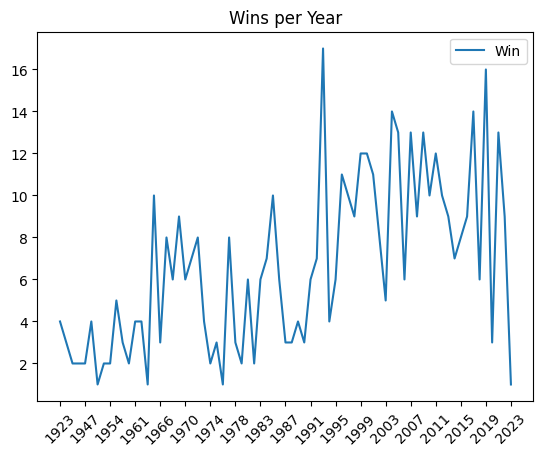

In [408]:
plt.plot( group_year_win["year"], group_year_win["count"], label = "Win", )
plt.xticks( group_year_win["year"][::4], rotation = 45)
plt.title("Wins per Year")
plt.legend()
plt.show()

## Plotting Losses Over the Years

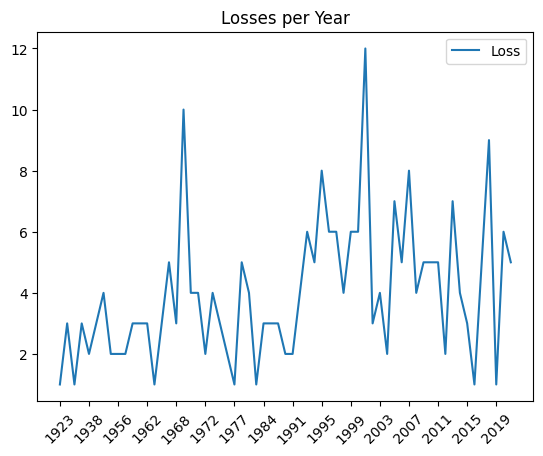

In [409]:
plt.plot( group_year_loss["year"], group_year_loss["count"], label = "Loss" )
plt.xticks( group_year_loss["year"][::4], rotation = 45)
plt.title("Losses per Year")
plt.legend()
plt.show()

## Plotting Ties Over the Years

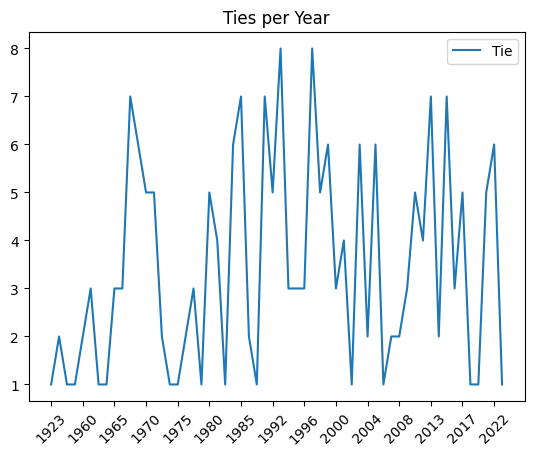

In [410]:
plt.plot( group_year_tie["year"], group_year_tie["count"], label = "Tie" )
plt.xticks( group_year_tie["year"][::4], rotation = 45)
plt.title("Ties per Year")
plt.legend()
plt.show()

## Plotting Wins/Losses/Ties Over the Years

<Axes: title={'center': 'Wins, Losses and Ties per Year'}, xlabel='year'>

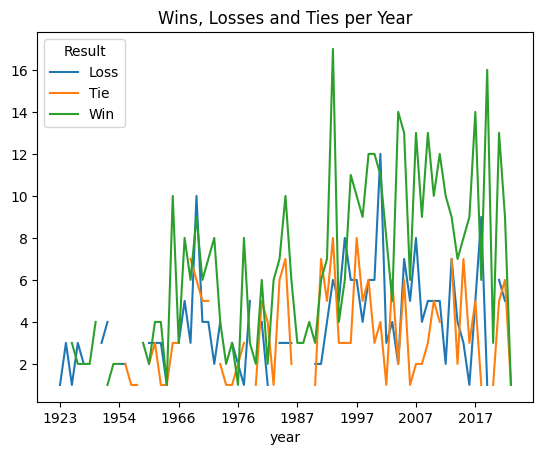

In [411]:
pivot = pd.pivot_table( df_mexico_merged_group_year, values= "count", columns= "Result", index="year")
pivot.plot(title= "Wins, Losses and Ties per Year")

In [412]:
percent_mexico_win = len(df_mexico_merged[ df_mexico_merged.Result == "Win"]) / len(df_mexico_merged)
percent_mexico_loss = len(df_mexico_merged[ df_mexico_merged.Result == "Loss"]) / len(df_mexico_merged)
percent_mexico_tie = len(df_mexico_merged[ df_mexico_merged.Result == "Tie"]) / len(df_mexico_merged)
overall_mexico_win_loss_tie_perc = pd.DataFrame( { "Win_%" : 100*round(percent_mexico_win, 4), "Loss_%" :100*round(percent_mexico_loss, 3), "Tie_%" : 100*round(percent_mexico_tie, 3) },
index = [0])
overall_mexico_win_loss_tie_perc

,Win_%,Loss_%,Tie_%
0,51.65,26.8,21.6


# Part Three - *Further Digging*

### I am wondering if Simpson's Paradox plays a role here
### Will see if grouping by tournament changes results

In [413]:
df_mexico_merged_group_tournament = df_mexico_merged.groupby( ["tournament", "Result"]).agg("count").reset_index()[["tournament", "Result", "date"]].rename( columns= {"date" : "count"})

In [414]:
df_mexico_pivot_group_tournament = pd.pivot_table(df_mexico_merged_group_tournament, values="count", columns="tournament", index="Result")
df_mexico_pivot_group_tournament = df_mexico_pivot_group_tournament.fillna(0)
df_mexico_pivot_group_tournament

tournament,CONCACAF Championship,CONCACAF Championship qualification,CONCACAF Nations League,Confederations Cup,Copa América,FIFA World Cup,FIFA World Cup qualification,Friendly,Gold Cup,Kirin Cup,Korea Cup,Lunar New Year Cup,NAFC Championship,NAFU Championship,Pan American Championship,USA Cup
Result,,,,,,,,,,,,,,,,
Loss,6.0,3.0,1.0,12.0,17.0,30.0,23.0,133.0,11.0,1.0,1.0,1.0,0.0,1.0,9.0,2.0
Tie,10.0,4.0,2.0,3.0,10.0,13.0,32.0,108.0,9.0,1.0,1.0,0.0,0.0,1.0,3.0,5.0
Win,23.0,9.0,7.0,12.0,21.0,17.0,105.0,215.0,59.0,0.0,2.0,2.0,4.0,1.0,1.0,6.0


In [415]:
df_mexico_pivot_group_tournament.columns

Index(['CONCACAF Championship', 'CONCACAF Championship qualification',
       'CONCACAF Nations League', 'Confederations Cup', 'Copa América',
       'FIFA World Cup', 'FIFA World Cup qualification', 'Friendly',
       'Gold Cup', 'Kirin Cup', 'Korea Cup', 'Lunar New Year Cup',
       'NAFC Championship', 'NAFU Championship', 'Pan American Championship',
       'USA Cup'],
      dtype='object', name='tournament')

In [416]:
percent_win_CONCACAF_Championship      = 100*df_mexico_pivot_group_tournament["CONCACAF Championship"].loc[              "Win" ] / df_mexico_pivot_group_tournament["CONCACAF Championship"].sum()
percent_win_CONCACAF_Championship_qual = 100*df_mexico_pivot_group_tournament["CONCACAF Championship qualification"].loc["Win" ] / df_mexico_pivot_group_tournament["CONCACAF Championship qualification"].sum()
percent_win_CONCACAF_nations_league    = 100*df_mexico_pivot_group_tournament["CONCACAF Nations League"].loc[            "Win" ] / df_mexico_pivot_group_tournament["CONCACAF Nations League"].sum()
percent_win_confederations_cup         = 100*df_mexico_pivot_group_tournament["Confederations Cup"].loc[                 "Win" ] / df_mexico_pivot_group_tournament["Confederations Cup"].sum()
percent_win_copa_america               = 100*df_mexico_pivot_group_tournament["Copa América"].loc[                       "Win" ] / df_mexico_pivot_group_tournament["Copa América"].sum()
percent_win_world_cup                  = 100*df_mexico_pivot_group_tournament["FIFA World Cup"].loc[                     "Win" ] / df_mexico_pivot_group_tournament["FIFA World Cup"].sum()
percent_win_world_cup_qual             = 100*df_mexico_pivot_group_tournament["FIFA World Cup qualification"].loc[       "Win" ] / df_mexico_pivot_group_tournament["FIFA World Cup qualification"].sum()
percent_win_friendly                   = 100*df_mexico_pivot_group_tournament["Friendly"].loc[                           "Win" ] / df_mexico_pivot_group_tournament["Friendly"].sum()
percent_win_gold_cup                   = 100*df_mexico_pivot_group_tournament["Gold Cup"].loc[                           "Win" ] / df_mexico_pivot_group_tournament["Gold Cup"].sum()
percent_win_kirin_cup                  = 100*df_mexico_pivot_group_tournament["Kirin Cup"].loc[                          "Win" ] / df_mexico_pivot_group_tournament["Kirin Cup"].sum()
percent_win_korea_cup                  = 100*df_mexico_pivot_group_tournament["Korea Cup"].loc[                          "Win" ] / df_mexico_pivot_group_tournament["Korea Cup"].sum()
percent_win_lunar_new_year_cup         = 100*df_mexico_pivot_group_tournament["Lunar New Year Cup"].loc[                 "Win" ] / df_mexico_pivot_group_tournament["Lunar New Year Cup"].sum()
percent_win_NAFC_championship          = 100*df_mexico_pivot_group_tournament["NAFC Championship"].loc[                  "Win" ] / df_mexico_pivot_group_tournament["NAFC Championship"].sum()
percent_win_NAFU_championship          = 100*df_mexico_pivot_group_tournament["NAFU Championship"].loc[                  "Win" ] / df_mexico_pivot_group_tournament["NAFU Championship"].sum()
percent_win_pan_american_championship  = 100*df_mexico_pivot_group_tournament["Pan American Championship"].loc[          "Win" ] / df_mexico_pivot_group_tournament["Pan American Championship"].sum()
percent_win_USA_cup                    = 100*df_mexico_pivot_group_tournament["USA Cup"].loc[                            "Win" ] / df_mexico_pivot_group_tournament["USA Cup"].sum()

percent_loss_CONCACAF_Championship      = 100*df_mexico_pivot_group_tournament["CONCACAF Championship"].loc[              "Loss" ] / df_mexico_pivot_group_tournament["CONCACAF Championship"].sum()
percent_loss_CONCACAF_Championship_qual = 100*df_mexico_pivot_group_tournament["CONCACAF Championship qualification"].loc["Loss" ] / df_mexico_pivot_group_tournament["CONCACAF Championship qualification"].sum()
percent_loss_CONCACAF_nations_league    = 100*df_mexico_pivot_group_tournament["CONCACAF Nations League"].loc[            "Loss" ] / df_mexico_pivot_group_tournament["CONCACAF Nations League"].sum()
percent_loss_confederations_cup         = 100*df_mexico_pivot_group_tournament["Confederations Cup"].loc[                 "Loss" ] / df_mexico_pivot_group_tournament["Confederations Cup"].sum()
percent_loss_copa_america               = 100*df_mexico_pivot_group_tournament["Copa América"].loc[                       "Loss" ] / df_mexico_pivot_group_tournament["Copa América"].sum()
percent_loss_world_cup                  = 100*df_mexico_pivot_group_tournament["FIFA World Cup"].loc[                     "Loss" ] / df_mexico_pivot_group_tournament["FIFA World Cup"].sum()
percent_loss_world_cup_qual             = 100*df_mexico_pivot_group_tournament["FIFA World Cup qualification"].loc[       "Loss" ] / df_mexico_pivot_group_tournament["FIFA World Cup qualification"].sum()
percent_loss_friendly                   = 100*df_mexico_pivot_group_tournament["Friendly"].loc[                           "Loss" ] / df_mexico_pivot_group_tournament["Friendly"].sum()
percent_loss_gold_cup                   = 100*df_mexico_pivot_group_tournament["Gold Cup"].loc[                           "Loss" ] / df_mexico_pivot_group_tournament["Gold Cup"].sum()
percent_loss_kirin_cup                  = 100*df_mexico_pivot_group_tournament["Kirin Cup"].loc[                          "Loss" ] / df_mexico_pivot_group_tournament["Kirin Cup"].sum()
percent_loss_korea_cup                  = 100*df_mexico_pivot_group_tournament["Korea Cup"].loc[                          "Loss" ] / df_mexico_pivot_group_tournament["Korea Cup"].sum()
percent_loss_lunar_new_year_cup         = 100*df_mexico_pivot_group_tournament["Lunar New Year Cup"].loc[                 "Loss" ] / df_mexico_pivot_group_tournament["Lunar New Year Cup"].sum()
percent_loss_NAFC_championship          = 100*df_mexico_pivot_group_tournament["NAFC Championship"].loc[                  "Loss" ] / df_mexico_pivot_group_tournament["NAFC Championship"].sum()
percent_loss_NAFU_championship          = 100*df_mexico_pivot_group_tournament["NAFU Championship"].loc[                  "Loss" ] / df_mexico_pivot_group_tournament["NAFU Championship"].sum()
percent_loss_pan_american_championship  = 100*df_mexico_pivot_group_tournament["Pan American Championship"].loc[          "Loss" ] / df_mexico_pivot_group_tournament["Pan American Championship"].sum()
percent_loss_USA_cup                    = 100*df_mexico_pivot_group_tournament["USA Cup"].loc[                            "Loss" ] / df_mexico_pivot_group_tournament["USA Cup"].sum()

percent_tie_CONCACAF_Championship      = 100*df_mexico_pivot_group_tournament["CONCACAF Championship"].loc[              "Tie" ] / df_mexico_pivot_group_tournament["CONCACAF Championship"].sum()
percent_tie_CONCACAF_Championship_qual = 100*df_mexico_pivot_group_tournament["CONCACAF Championship qualification"].loc["Tie" ] / df_mexico_pivot_group_tournament["CONCACAF Championship qualification"].sum()
percent_tie_CONCACAF_nations_league    = 100*df_mexico_pivot_group_tournament["CONCACAF Nations League"].loc[            "Tie" ] / df_mexico_pivot_group_tournament["CONCACAF Nations League"].sum()
percent_tie_confederations_cup         = 100*df_mexico_pivot_group_tournament["Confederations Cup"].loc[                 "Tie" ] / df_mexico_pivot_group_tournament["Confederations Cup"].sum()
percent_tie_copa_america               = 100*df_mexico_pivot_group_tournament["Copa América"].loc[                       "Tie" ] / df_mexico_pivot_group_tournament["Copa América"].sum()
percent_tie_world_cup                  = 100*df_mexico_pivot_group_tournament["FIFA World Cup"].loc[                     "Tie" ] / df_mexico_pivot_group_tournament["FIFA World Cup"].sum()
percent_tie_world_cup_qual             = 100*df_mexico_pivot_group_tournament["FIFA World Cup qualification"].loc[       "Tie" ] / df_mexico_pivot_group_tournament["FIFA World Cup qualification"].sum()
percent_tie_friendly                   = 100*df_mexico_pivot_group_tournament["Friendly"].loc[                           "Tie" ] / df_mexico_pivot_group_tournament["Friendly"].sum()
percent_tie_gold_cup                   = 100*df_mexico_pivot_group_tournament["Gold Cup"].loc[                           "Tie" ] / df_mexico_pivot_group_tournament["Gold Cup"].sum()
percent_tie_kirin_cup                  = 100*df_mexico_pivot_group_tournament["Kirin Cup"].loc[                          "Tie" ] / df_mexico_pivot_group_tournament["Kirin Cup"].sum()
percent_tie_korea_cup                  = 100*df_mexico_pivot_group_tournament["Korea Cup"].loc[                          "Tie" ] / df_mexico_pivot_group_tournament["Korea Cup"].sum()
percent_tie_lunar_new_year_cup         = 100*df_mexico_pivot_group_tournament["Lunar New Year Cup"].loc[                 "Tie" ] / df_mexico_pivot_group_tournament["Lunar New Year Cup"].sum()
percent_tie_NAFC_championship          = 100*df_mexico_pivot_group_tournament["NAFC Championship"].loc[                  "Tie" ] / df_mexico_pivot_group_tournament["NAFC Championship"].sum()
percent_tie_NAFU_championship          = 100*df_mexico_pivot_group_tournament["NAFU Championship"].loc[                  "Tie" ] / df_mexico_pivot_group_tournament["NAFU Championship"].sum()
percent_tie_pan_american_championship  = 100*df_mexico_pivot_group_tournament["Pan American Championship"].loc[          "Tie" ] / df_mexico_pivot_group_tournament["Pan American Championship"].sum()
percent_tie_USA_cup                    = 100*df_mexico_pivot_group_tournament["USA Cup"].loc[                            "Tie" ] / df_mexico_pivot_group_tournament["USA Cup"].sum()

In [417]:
tournament_mexico_win_loss_tie_perc = pd.DataFrame( {
    "tournament" : [ 'CONCACAF Championship', 'CONCACAF Championship qualification',
                     'CONCACAF Nations League', 'Confederations Cup', 'Copa América',
                     'FIFA World Cup', 'FIFA World Cup qualification', 'Friendly',
                     'Gold Cup', 'Kirin Cup', 'Korea Cup', 'Lunar New Year Cup',
                     'NAFC Championship', 'NAFU Championship', 'Pan American Championship',
                     'USA Cup'],
    "Win_%" : [ percent_win_CONCACAF_Championship,
                percent_win_CONCACAF_Championship_qual,
                percent_win_CONCACAF_nations_league,
                percent_win_confederations_cup,
                percent_win_copa_america,
                percent_win_world_cup,
                percent_win_world_cup_qual,
                percent_win_friendly,
                percent_win_gold_cup,
                percent_win_kirin_cup,
                percent_win_korea_cup,
                percent_win_lunar_new_year_cup,
                percent_win_NAFC_championship,
                percent_win_NAFU_championship,
                percent_win_pan_american_championship,
                percent_win_USA_cup ],
    "Loss_%" : [ percent_loss_CONCACAF_Championship,
                 percent_loss_CONCACAF_Championship_qual,
                 percent_loss_CONCACAF_nations_league,
                 percent_loss_confederations_cup,
                 percent_loss_copa_america,
                 percent_loss_world_cup,
                 percent_loss_world_cup_qual,
                 percent_loss_friendly,
                 percent_loss_gold_cup,
                 percent_loss_kirin_cup,
                 percent_loss_korea_cup,
                 percent_loss_lunar_new_year_cup,
                 percent_loss_NAFC_championship,
                 percent_loss_NAFU_championship,
                 percent_loss_pan_american_championship,
                 percent_loss_USA_cup ],
    "Tie_%" : [ percent_tie_CONCACAF_Championship,
                percent_tie_CONCACAF_Championship_qual,
                percent_tie_CONCACAF_nations_league,
                percent_tie_confederations_cup,
                percent_tie_copa_america,
                percent_tie_world_cup,
                percent_tie_world_cup_qual,
                percent_tie_friendly,
                percent_tie_gold_cup,
                percent_tie_kirin_cup,
                percent_tie_korea_cup,
                percent_tie_lunar_new_year_cup,
                percent_tie_NAFC_championship,
                percent_tie_NAFU_championship,
                percent_tie_pan_american_championship,
                percent_tie_USA_cup ] })


In [418]:
def greater_column(column):
    if column[1] > column[2]:
        if column[1] > column[3]:
            return "Win"
        elif column[1] == column[3]:
            return "Win/Tie"
        else:
            return "Tie"
    elif column[1] == column[3]:
        if column[1] == column[2]:
            return "Equal Percentage"
    elif column[1] == column[2]:
        return "Win/Loss"
    elif column[2] == column[3]:
        return "Loss/Tie"
    else:
        return "Loss"

# Part Four - *Final Data Results*

In [419]:
doc = docx.Document()

In [420]:
tournament_mexico_win_loss_tie_perc["greater_percentage"] = tournament_mexico_win_loss_tie_perc.apply(greater_column, axis = 1)
tournament_mexico_win_loss_tie_perc = round(tournament_mexico_win_loss_tie_perc, 3)
tournament_mexico_win_loss_tie_perc

,tournament,Win_%,Loss_%,Tie_%,greater_percentage
0,CONCACAF Championship,58.974,15.385,25.641,Win
1,CONCACAF Championship qualification,56.250,18.750,25.000,Win
2,CONCACAF Nations League,70.000,10.000,20.000,Win
3,Confederations Cup,44.444,44.444,11.111,Win/Loss
4,Copa América,43.750,35.417,20.833,Win
5,FIFA World Cup,28.333,50.000,21.667,Loss
6,FIFA World Cup qualification,65.625,14.375,20.000,Win
7,Friendly,47.149,29.167,23.684,Win
8,Gold Cup,74.684,13.924,11.392,Win
9,Kirin Cup,0.000,50.000,50.000,Loss/Tie


In [421]:
overall_mexico_win_loss_tie_perc

,Win_%,Loss_%,Tie_%
0,51.65,26.8,21.6


In [422]:
t1 = doc.add_table(rows=tournament_mexico_win_loss_tie_perc.shape[0], cols=tournament_mexico_win_loss_tie_perc.shape[1])

In [423]:
for i in range(tournament_mexico_win_loss_tie_perc.shape[0]):
    for j in range(tournament_mexico_win_loss_tie_perc.shape[1]):
        cell1 = tournament_mexico_win_loss_tie_perc.iat[i, j]
        t1.cell(i, j).text = str(cell1)

In [424]:
doc.save('table 1.docx')

In [425]:
t2 = doc.add_table(rows=overall_mexico_win_loss_tie_perc.shape[0], cols=overall_mexico_win_loss_tie_perc.shape[1])

In [426]:
for i in range(overall_mexico_win_loss_tie_perc.shape[0]):
    for j in range(overall_mexico_win_loss_tie_perc.shape[1]):
        cell2 = overall_mexico_win_loss_tie_perc.iat[i, j]
        t2.cell(i, j).text = str(cell2)

In [427]:
doc.save('table 2.docx')